<a href="https://colab.research.google.com/github/nrzsdy1993/Car_Line/blob/main/step02_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## torch GPU 설정

In [1]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda:0")

## MNIST 데이터 셋

In [2]:
from torchvision import datasets

PATH_DATA = "./data"
train_data = datasets.MNIST(PATH_DATA, train = True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


- extract the input data and target labels

In [3]:
X_train, y_train = train_data.data, train_data.targets
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


- Load the MNIST test dataset

In [4]:
val_data = datasets.MNIST(PATH_DATA, train = False, download=True)
X_val, y_val = val_data.data, val_data.targets
print(X_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


- Add a new dimension to the tensors


In [5]:
if len(X_train.shape) == 3:
  X_train = X_train.unsqueeze(1)
print(X_train.shape)

if len(X_val.shape) == 3:
  X_val = X_val.unsqueeze(1)
print(X_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


## Visualization

In [6]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [7]:
def show(img):
  # convert tensor to numpy array
  np_img = img.numpy()

  # Convert to H * W * C shape
  np_img_tr = np.transpose(np_img, (1, 2, 0))

  plt.imshow(np_img_tr, interpolation='nearest')

torch.Size([3, 152, 122])


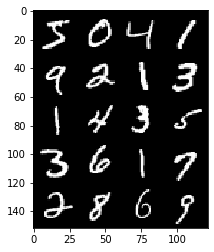

In [8]:
X_grid = utils.make_grid(X_train[:20], nrow=4, padding=2)
print(X_grid.shape)

show(X_grid)